**EDA 1: Bike Details Dataset**

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

# Download and load the dataset
url = "https://drive.google.com/uc?id=1iKy23bMtEQShF_weneRNnYrFmzvpPOI3"  # Modified Google Drive link
bike_data = pd.read_csv(url)

# Display the first few rows of the dataset
print(bike_data.head())

# Check basic dataset information
print(bike_data.info())


                                  name  selling_price  year seller_type  \
0            Royal Enfield Classic 350         175000  2019  Individual   
1                            Honda Dio          45000  2017  Individual   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                Yamaha SZ [2013-2014]          20000  2011  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000           148114.0  
3  1st owner      23000            89643.0  
4  2nd owner      21000                NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 

**1. What is the range of selling prices in the dataset ?**

In [2]:
selling_price_min = bike_data['selling_price'].min()  # Minimum selling price
selling_price_max = bike_data['selling_price'].max()  # Maximum selling price

print(f"The range of selling prices is: {selling_price_min} to {selling_price_max}")

The range of selling prices is: 5000 to 760000


**2. What is the median selling price for bikes in the dataset ?**

In [3]:

# Calculate the median selling price
median_selling_price = bike_data['selling_price'].median()

# Display the result
print(f"The median selling price for bikes is: {median_selling_price}")

The median selling price for bikes is: 45000.0


**3. What is the most common seller type?**

In [4]:

# Find the most common seller type
most_common_seller_type = bike_data['seller_type'].mode()[0]

# Display the result
print(f"The most common seller type is: {most_common_seller_type}")

The most common seller type is: Individual


**4. How many bikes have driven more than 50,000 kilometers?**

In [5]:
# Filter bikes with km_driven > 50,000
bikes_over_50k = bike_data[bike_data['km_driven'] > 50000]

# Count the number of such bikes
count_bikes_over_50k = bikes_over_50k.shape[0]

# Display the result
print(f"The number of bikes that have driven more than 50,000 kilometers is: {count_bikes_over_50k}")

The number of bikes that have driven more than 50,000 kilometers is: 170


**5. What is the average km_driven value for each ownership type?**

In [6]:

# Group data by ownership type and calculate the average km_driven
average_km_driven_by_owner = bike_data.groupby('owner')['km_driven'].mean()

# Display the result
print("Average km_driven for each ownership type:")
print(average_km_driven_by_owner)


Average km_driven for each ownership type:
owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


**6. What proportion of bikes are from the year 2015 or older?**

In [7]:
# Calculate the proportion of bikes from 2015 or older
proportion_2015_older = len(bike_data[bike_data['year'] <= 2015]) / len(bike_data)

# Display the result
print(f"The proportion of bikes from 2015 or older is: {proportion_2015_older}")

The proportion of bikes from 2015 or older is: 0.5664467483506126


**7. What is the trend of missing values across the dataset?**

                   Missing Values  Percentage
ex_showroom_price             435   40.999057
selling_price                   0    0.000000
name                            0    0.000000
year                            0    0.000000
seller_type                     0    0.000000
owner                           0    0.000000
km_driven                       0    0.000000


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'ex_showroom_price'),
  Text(1, 0, 'selling_price'),
  Text(2, 0, 'name'),
  Text(3, 0, 'year'),
  Text(4, 0, 'seller_type'),
  Text(5, 0, 'owner'),
  Text(6, 0, 'km_driven')])

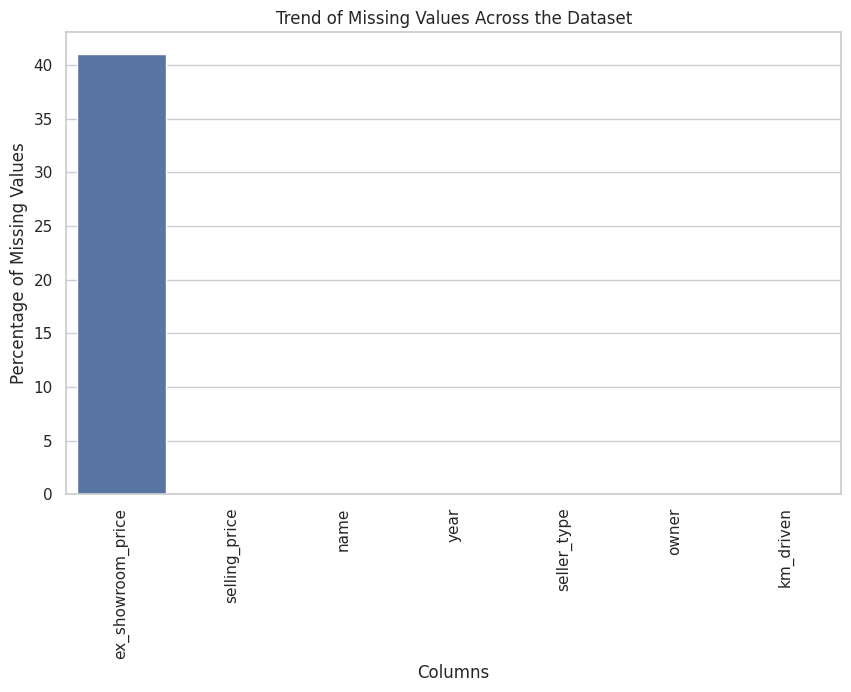

In [8]:
# Check for missing values in each column
missing_values = bike_data.isnull().sum()

# Calculate the percentage of missing values in each column
missing_percentage = (missing_values / len(bike_data)) * 100

# Create a DataFrame to display the results
missing_data_summary = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

# Sort the DataFrame by the percentage of missing values in descending order
missing_data_summary = missing_data_summary.sort_values('Percentage', ascending=False)

# Display the summary
print(missing_data_summary)


# Visualize the trend of missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_data_summary.index, y=missing_data_summary['Percentage'])
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.title('Trend of Missing Values Across the Dataset')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

**8. What is the highest ex_showroom_price recorded, and for which bike?**

In [9]:

# Find the highest ex_showroom_price and the corresponding bike name
highest_ex_showroom_price = bike_data['ex_showroom_price'].max()
bike_with_highest_price = bike_data.loc[bike_data['ex_showroom_price'] == highest_ex_showroom_price, 'name']

print(f"The highest ex_showroom_price is: {highest_ex_showroom_price}")
print(f"The bike with the highest ex_showroom price is: {bike_with_highest_price.iloc[0]}")

The highest ex_showroom_price is: 1278000.0
The bike with the highest ex_showroom price is: Harley-Davidson Street Bob


**9. What is the total number of bikes listed by each seller type?**

In [10]:

# Calculate the total number of bikes listed by each seller type
bike_counts_by_seller = bike_data.groupby('seller_type')['name'].count()

# Display the result
print("Total number of bikes listed by each seller type:")
bike_counts_by_seller


Total number of bikes listed by each seller type:


,name
seller_type,
Dealer,6
Individual,1055


**10. What is the relationship between selling_price and km_driven for first-owner bikes?**

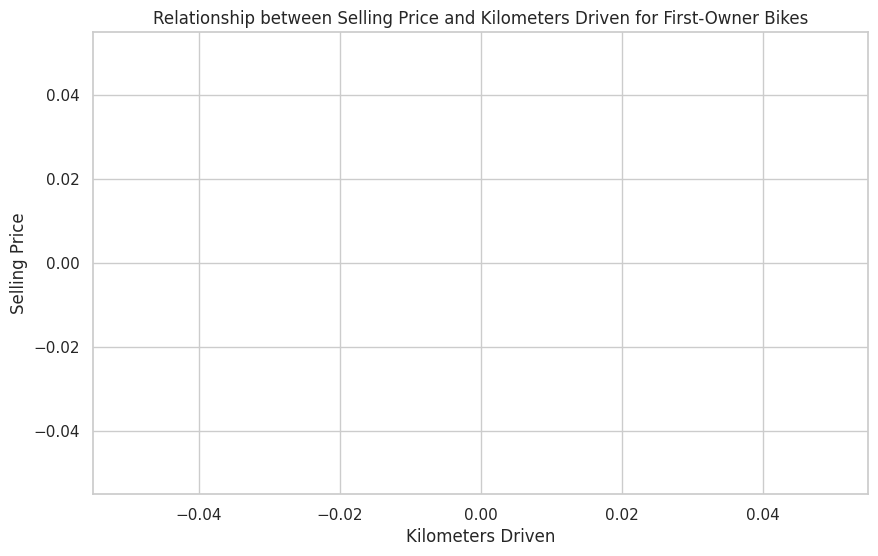

The correlation between selling price and km_driven for first-owner bikes is: nan


In [11]:

# Filter for first-owner bikes
first_owner_bikes = bike_data[bike_data['owner'] == 'First Owner']

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='km_driven', y='selling_price', data=first_owner_bikes, alpha=0.5)
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.title('Relationship between Selling Price and Kilometers Driven for First-Owner Bikes')
plt.show()

# Calculate the correlation coefficient
correlation = first_owner_bikes['km_driven'].corr(first_owner_bikes['selling_price'])
print(f"The correlation between selling price and km_driven for first-owner bikes is: {correlation}")

**11. Identify and remove outliers in the km_driven column using the IQR method?**

In [12]:

# Calculate Q1, Q3, and IQR
Q1 = bike_data['km_driven'].quantile(0.25)
Q3 = bike_data['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and remove outliers
bike_data_no_outliers = bike_data[~((bike_data['km_driven'] < lower_bound) | (bike_data['km_driven'] > upper_bound))]

# Display the cleaned dataset
bike_data_no_outliers

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1054,Hero CBZ Xtreme,20000,2010,Individual,1st owner,50000,78700.0
1055,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0


**12. Perform a bivariate analysis to visualize the relationship between year and selling_price.**

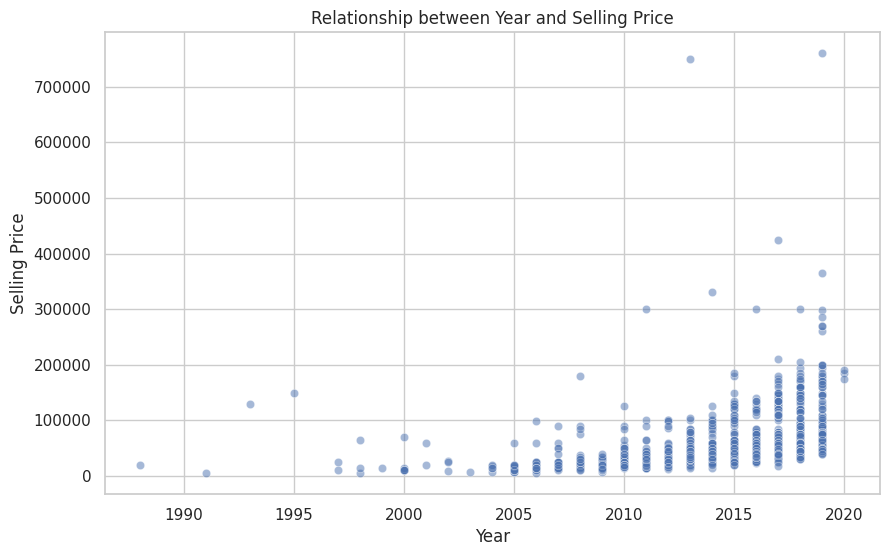

The correlation between year and selling_price is: 0.40218840061474403


In [13]:
# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='selling_price', data=bike_data, alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.title('Relationship between Year and Selling Price')
plt.show()

# Calculate the correlation coefficient
correlation = bike_data['year'].corr(bike_data['selling_price'])
print(f"The correlation between year and selling_price is: {correlation}")

**13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year).?**

In [14]:
# Calculate the age of each bike
current_year = 2024  # Assuming the current year is 2024
bike_data['bike_age'] = current_year - bike_data['year']

# Calculate the depreciation for each bike
bike_data['depreciation'] = bike_data['ex_showroom_price'] - bike_data['selling_price']

# Calculate the average depreciation per year of age
average_depreciation_per_year = bike_data.groupby('bike_age')['depreciation'].mean()

# Display the result
print("Average Depreciation per year of bike age:")
average_depreciation_per_year

Average Depreciation per year of bike age:


,depreciation
bike_age,
4,-34260.000000
5,2954.562500
6,13023.194805
7,22306.082353
8,28328.190476
9,28013.275000
10,34505.606061
11,43086.886792
12,37317.648649


**14. Which bike names are priced significantly above the average price for their manufacturing year?**

In [15]:
# Calculate the average selling price for each year
average_price_by_year = bike_data.groupby('year')['selling_price'].mean()

# Merge the average price back into the original DataFrame
bike_data['average_price_for_year'] = bike_data['year'].map(average_price_by_year)

# Identify bikes priced significantly above average (e.g., 2 standard deviations above)
price_std = bike_data['selling_price'].std()
bike_data['price_diff'] = bike_data['selling_price'] - bike_data['average_price_for_year']

significantly_higher_priced_bikes = bike_data[bike_data['price_diff'] > 2*price_std]

# Display the names of these bikes
print("Bikes priced significantly above the average for their manufacturing year:")
print(significantly_higher_priced_bikes['name'])

Bikes priced significantly above the average for their manufacturing year:
7      Royal Enfield Bullet 350 [2007-2011]
13                            Yamaha YZF R3
130        Royal Enfield Continental GT 650
134              Harley-Davidson Street Bob
242                              KTM RC 390
261           Royal Enfield Interceptor 650
288                              KTM RC 390
289          Kawasaki Ninja 650 [2018-2019]
295                         Suzuki GSX S750
311              Harley-Davidson Street 750
315           Royal Enfield Interceptor 650
344                              BMW G310GS
407           Royal Enfield Interceptor 650
411            KTM 390 Duke ABS [2013-2016]
860          Kawasaki Ninja 650 [2018-2019]
890            Royal Enfield Classic Chrome
892                            KTM 390 Duke
897                      Kawasaki Ninja 300
Name: name, dtype: object


**15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.**

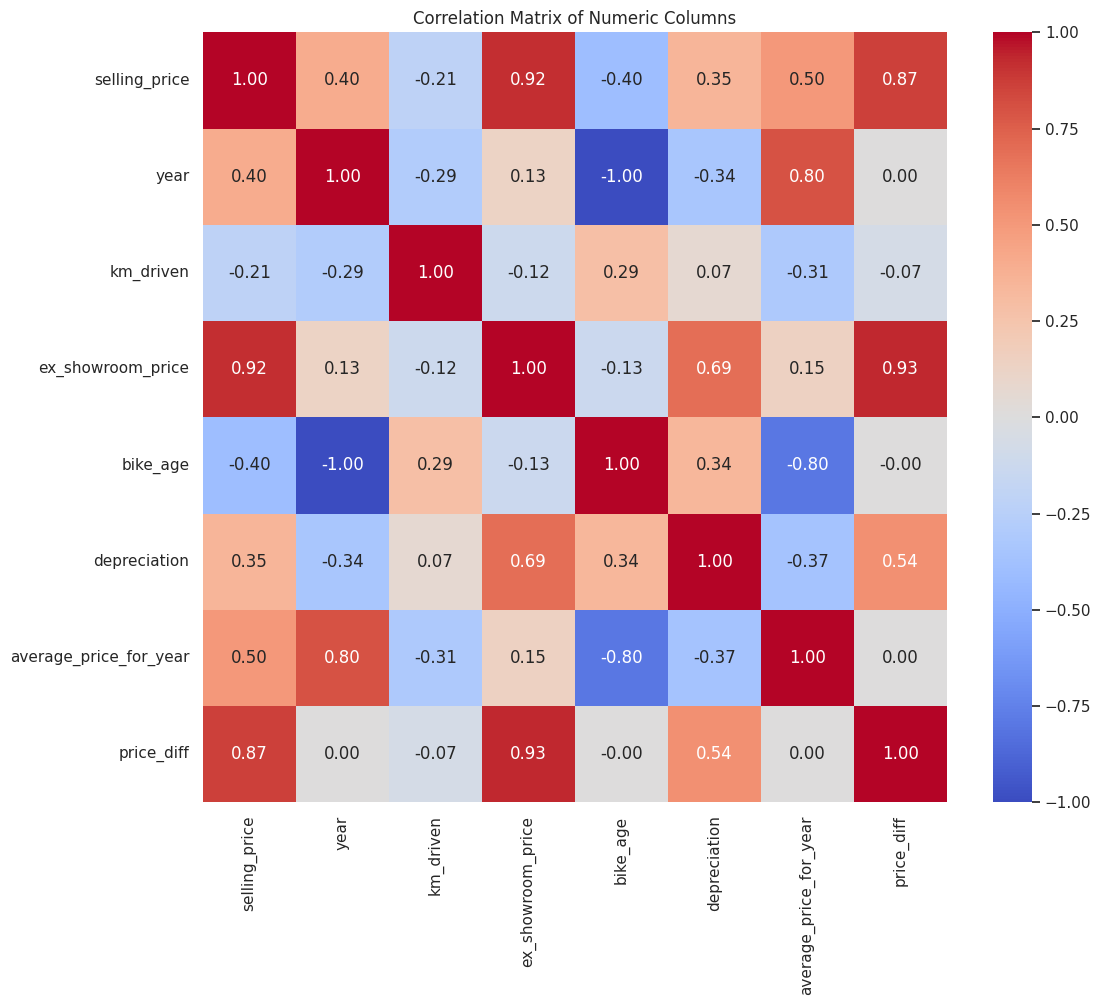

In [16]:
# Calculate the correlation matrix for numeric columns
numeric_cols = bike_data.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.show()


**Car Sale Dataset**

In [17]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

# Download and load the dataset
url = "https://drive.google.com/uc?id=1N0kM_zi-iU3yvr6BEJf21aiF599PtA0U" # Modified Google Drive link
car_data = pd.read_csv(url)

# Display the first few rows of the dataset
print(car_data.head())

# Check basic dataset information
print(car_data.info())

         Car_id      Date Customer Name Gender  Annual Income  \
0  C_CND_000001  1/2/2022     Geraldine   Male          13500   
1  C_CND_000002  1/2/2022           Gia   Male        1480000   
2  C_CND_000003  1/2/2022        Gianna   Male        1035000   
3  C_CND_000004  1/2/2022       Giselle   Male          13500   
4  C_CND_000005  1/2/2022         Grace   Male        1465000   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                      Engine Transmission       Color  Price ($)  Dealer_No   \
0  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
1  DoubleÂ Overhead Camshaft         Auto       Black      19000

**1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?**

Average Selling Price by Dealer:
Dealer_Name
Buddy Storbeck's Diesel Service Inc                27217.261563
C & M Motors Inc                                   28111.755200
Capitol KIA                                        28189.703822
Chrysler Plymouth                                  27555.526400
Chrysler of Tri-Cities                             28123.091054
Classic Chevy                                      28602.014446
Clay Johnson Auto Sales                            27816.027113
Diehl Motor CO Inc                                 27993.929487
Enterprise Rent A Car                              28312.580800
Gartner Buick Hyundai Saab                         28247.621019
Hatfield Volkswagen                                27853.712242
Iceberg Rentals                                    28522.958533
McKinney Dodge Chrysler Jeep                       27684.096979
Motor Vehicle Branch Office                        27956.739617
Nebo Chevrolet                                     27818.88

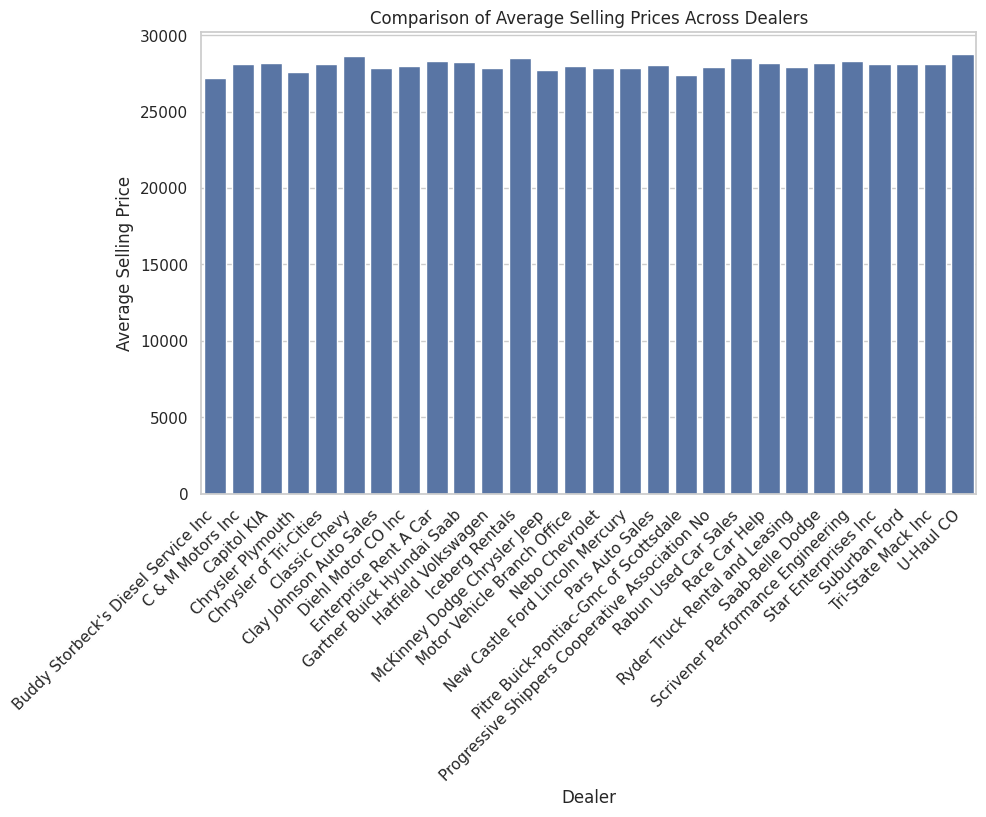

In [18]:
# Calculate the average selling price for each dealer
average_selling_price_by_dealer = car_data.groupby('Dealer_Name')['Price ($)'].mean()

# Display the result
print("Average Selling Price by Dealer:")
print(average_selling_price_by_dealer)

# Compare average selling prices across dealers (optional visualization)
plt.figure(figsize=(10, 6))
sns.barplot(x=average_selling_price_by_dealer.index, y=average_selling_price_by_dealer.values)
plt.xlabel('Dealer')
plt.ylabel('Average Selling Price')
plt.title('Comparison of Average Selling Prices Across Dealers')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

**2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?**

In [19]:
# Calculate the price variation (standard deviation) for each car brand
price_variation_by_brand = car_data.groupby('Company')['Price ($)'].std()

# Find the brand with the highest price variation
brand_with_highest_variation = price_variation_by_brand.idxmax()
highest_variation = price_variation_by_brand.max()

print(f"The car brand with the highest price variation is {brand_with_highest_variation} with a standard deviation of {highest_variation}.")

# Interpretation (example)
print(f"A high standard deviation in prices for {brand_with_highest_variation} suggests that their models span a wide range of price points, potentially indicating diverse features, model years, or conditions.")


The car brand with the highest price variation is Lincoln with a standard deviation of 19658.050211265567.
A high standard deviation in prices for Lincoln suggests that their models span a wide range of price points, potentially indicating diverse features, model years, or conditions.


**3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?**

Descriptive Statistics of Car Prices by Transmission Type:
                count          mean           std     min      25%      50%  \
Transmission                                                                  
Auto          12571.0  28248.525972  13747.070597  1200.0  19000.0  24000.0   
Manual        11335.0  27914.710631  15862.871978  1700.0  17000.0  22001.0   

                  75%      max  
Transmission                    
Auto          35500.0  75700.0  
Manual        34000.0  85800.0  

Interquartile Ranges (IQR) by Transmission Type:
Transmission
Auto      16500.0
Manual    17000.0
dtype: float64


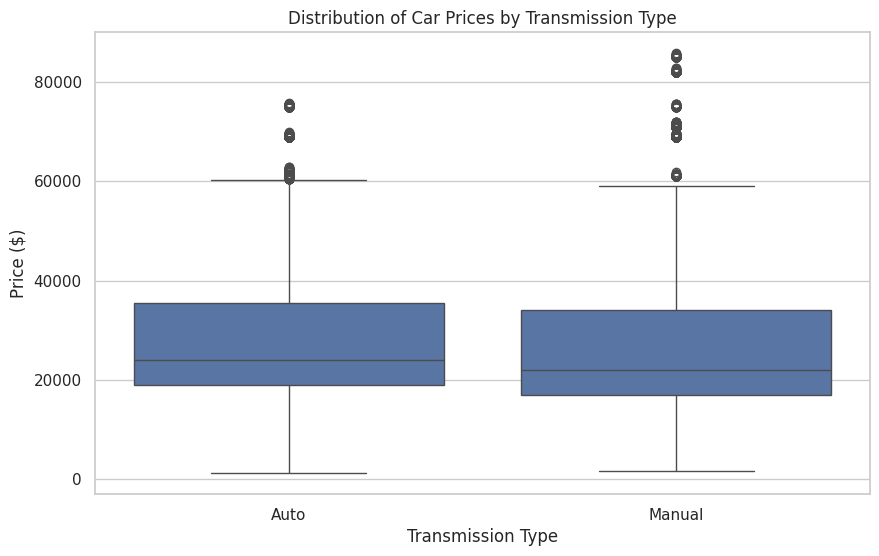

In [20]:
# Group data by transmission type and calculate relevant statistics
price_stats_by_transmission = car_data.groupby('Transmission')['Price ($)'].describe()

# Extract IQR for each transmission type
iqr_by_transmission = price_stats_by_transmission['75%'] - price_stats_by_transmission['25%']

# Display the results
print("Descriptive Statistics of Car Prices by Transmission Type:")
print(price_stats_by_transmission)
print("\nInterquartile Ranges (IQR) by Transmission Type:")
print(iqr_by_transmission)

# Visualization (optional)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission', y='Price ($)', data=car_data)
plt.xlabel('Transmission Type')
plt.ylabel('Price ($)')
plt.title('Distribution of Car Prices by Transmission Type')
plt.show()

**4. What is the distribution of car prices across different regions?**

Distribution of Car Prices by Region:
                count          mean           std     min      25%      50%  \
Dealer_Region                                                                 
Aurora         3130.0  28334.626837  15026.207252  9000.0  18001.0  23000.0   
Austin         4135.0  28341.603628  14903.884549  9000.0  18001.0  23801.0   
Greenville     3128.0  28180.819054  15101.538328  1200.0  18001.0  22500.0   
Janesville     3821.0  27833.350955  14344.995638  4300.0  18001.0  23000.0   
Middletown     3128.0  27856.338875  14619.842395  1700.0  18000.0  22750.0   
Pasco          3131.0  28119.039923  14659.315941  9000.0  18500.5  23000.0   
Scottsdale     3433.0  27954.958928  14902.916820  1450.0  18000.0  22600.0   

                   75%      max  
Dealer_Region                    
Aurora         35000.0  85800.0  
Austin         35001.0  85601.0  
Greenville     34500.0  85200.0  
Janesville     34000.0  85400.0  
Middletown     34000.0  85300.0  
Pasco       

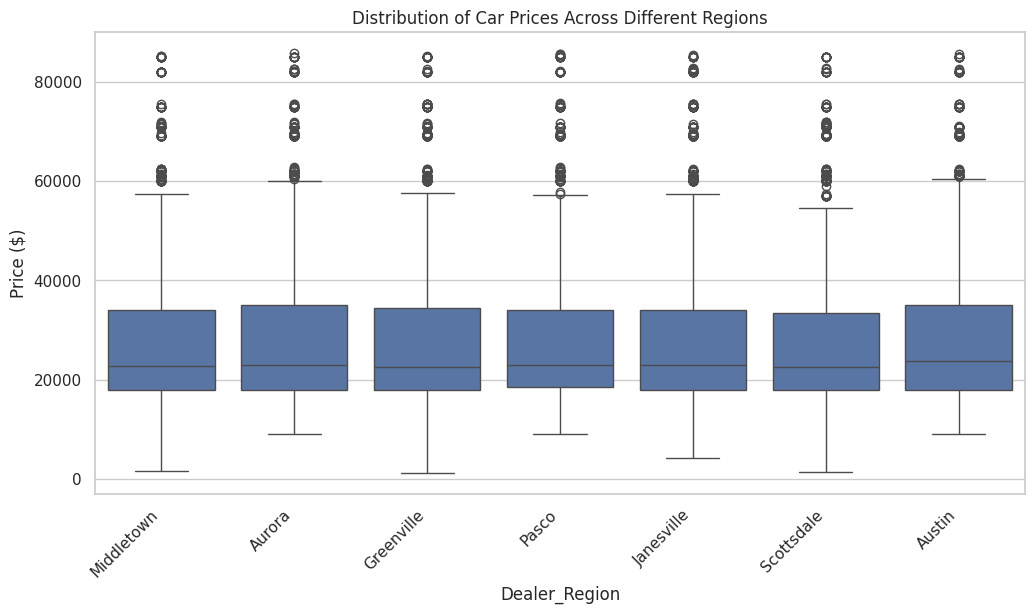

In [21]:
# Calculate the distribution of car prices across different regions
price_distribution_by_region = car_data.groupby('Dealer_Region')['Price ($)'].describe()

# Display the results
print("Distribution of Car Prices by Region:")
print(price_distribution_by_region)

# Visualization (optional)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=car_data)
plt.xlabel('Dealer_Region')
plt.ylabel('Price ($)')
plt.title('Distribution of Car Prices Across Different Regions')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

**5. What is the distribution of cars based on body styles?**

Distribution of Cars Based on Body Styles:
Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


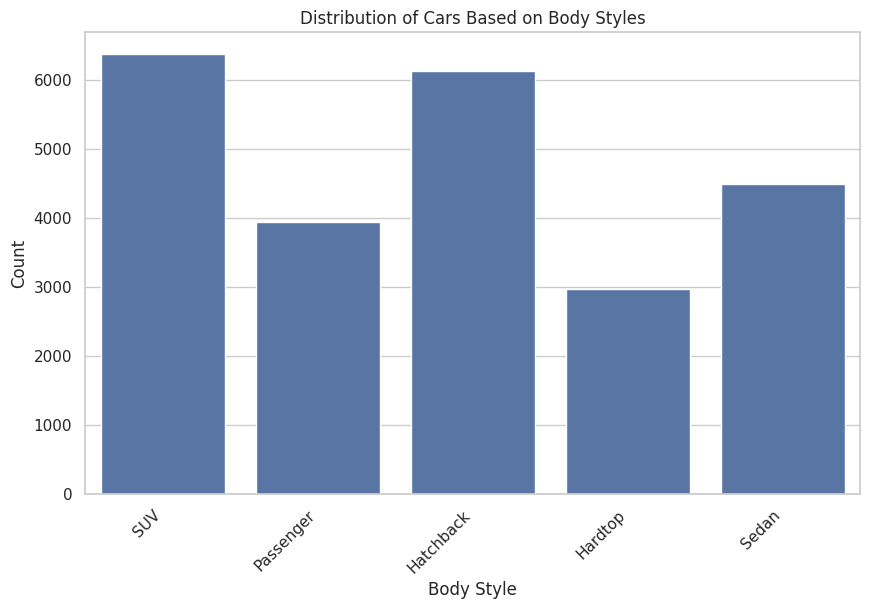

In [22]:
# Calculate the distribution of cars based on body styles
body_style_counts = car_data['Body Style'].value_counts()

# Display the results
print("Distribution of Cars Based on Body Styles:")
print(body_style_counts)

# Visualization (optional)
plt.figure(figsize=(10, 6))
sns.countplot(x='Body Style', data=car_data)
plt.xlabel('Body Style')
plt.ylabel('Count')
plt.title('Distribution of Cars Based on Body Styles')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

**6. How does the average selling price of cars vary by customer gender and annual income?**

Average Selling Price by Customer Gender and Annual Income:
Annual Income  10080         13500     24000     85000     106000    121000    \
Gender                                                                          
Female              NaN  28132.038732       NaN       NaN   46001.0   20000.0   
Male            22801.0  27809.493111   61001.0   43000.0       NaN       NaN   

Annual Income  131000    145000    160000    170000    ...  6125000   \
Gender                                                 ...             
Female              NaN       NaN       NaN       NaN  ...       NaN   
Male            17000.0   16500.0   18334.0   14500.0  ...   19501.0   

Annual Income  6240000   6400000   6460000   6500000   6600000   6800000   \
Gender                                                                      
Female          42000.0   32001.0   14000.0       NaN       NaN       NaN   
Male                NaN   71000.0       NaN   25000.0   39000.0   15000.0   

Annual Income  76

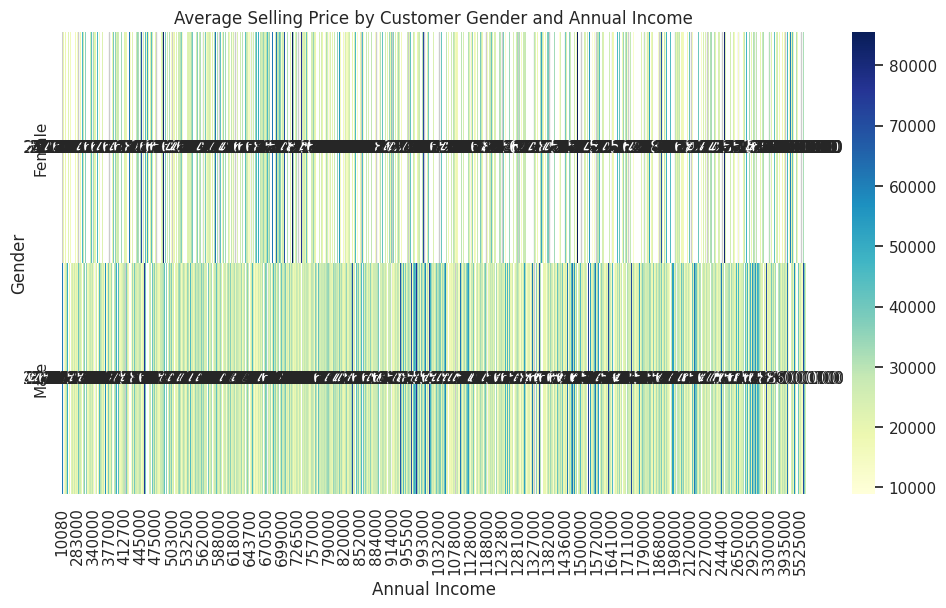

In [23]:
# Assuming 'Customer_Gender' and 'Annual_Income' columns exist in your DataFrame
# If not, replace with the correct column names from your dataset

# Group data by customer gender and annual income and calculate the average selling price
average_price_by_gender_income = car_data.groupby(['Gender', 'Annual Income'])['Price ($)'].mean().unstack()

# Display the result
print("Average Selling Price by Customer Gender and Annual Income:")
print(average_price_by_gender_income)

# Visualization (optional)
plt.figure(figsize=(12, 6))
sns.heatmap(average_price_by_gender_income, annot=True, fmt=".2f", cmap="YlGnBu")
plt.xlabel("Annual Income")
plt.ylabel("Gender")
plt.title("Average Selling Price by Customer Gender and Annual Income")
plt.show()

**7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?**

Distribution of Car Prices by Region:
                count          mean           std     min      25%      50%  \
Dealer_Region                                                                 
Aurora         3130.0  28334.626837  15026.207252  9000.0  18001.0  23000.0   
Austin         4135.0  28341.603628  14903.884549  9000.0  18001.0  23801.0   
Greenville     3128.0  28180.819054  15101.538328  1200.0  18001.0  22500.0   
Janesville     3821.0  27833.350955  14344.995638  4300.0  18001.0  23000.0   
Middletown     3128.0  27856.338875  14619.842395  1700.0  18000.0  22750.0   
Pasco          3131.0  28119.039923  14659.315941  9000.0  18500.5  23000.0   
Scottsdale     3433.0  27954.958928  14902.916820  1450.0  18000.0  22600.0   

                   75%      max  
Dealer_Region                    
Aurora         35000.0  85800.0  
Austin         35001.0  85601.0  
Greenville     34500.0  85200.0  
Janesville     34000.0  85400.0  
Middletown     34000.0  85300.0  
Pasco       

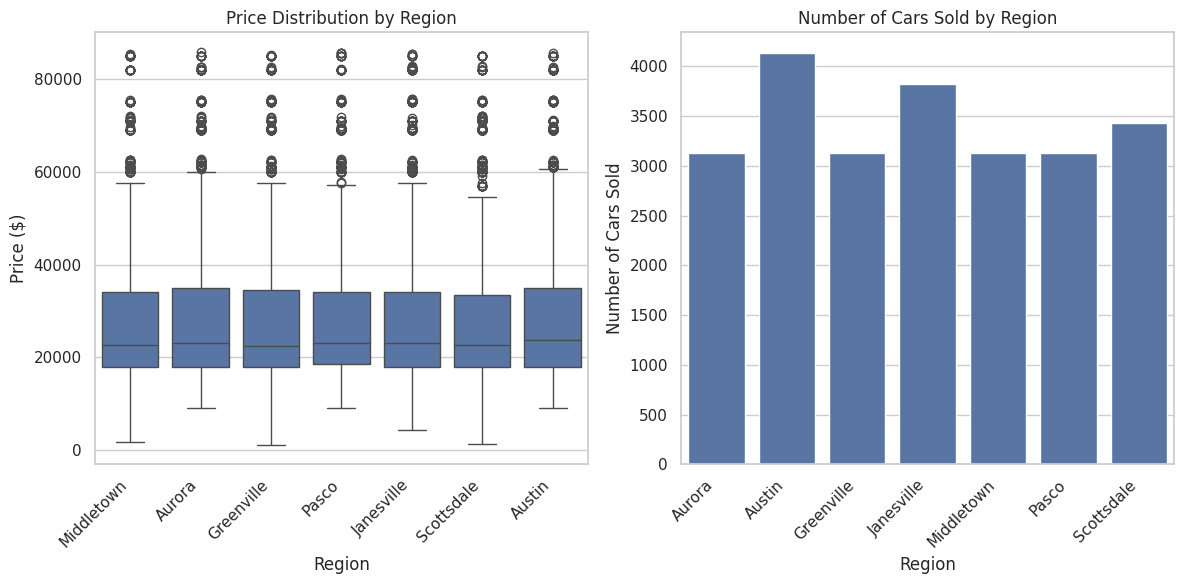

In [24]:
# Calculate the distribution of car prices by region
price_distribution_by_region = car_data.groupby('Dealer_Region')['Price ($)'].describe()

# Display the price distribution
print("Distribution of Car Prices by Region:")
print(price_distribution_by_region)

# Calculate the number of cars sold in each region
cars_sold_by_region = car_data.groupby('Dealer_Region')['Price ($)'].count()

# Display the number of cars sold by region
print("\nNumber of Cars Sold by Region:")
print(cars_sold_by_region)

# Visualization (optional): Combine price distribution and sales volume
plt.figure(figsize=(12, 6))

# Box plot for price distribution
plt.subplot(1, 2, 1)
sns.boxplot(x='Dealer_Region', y='Price ($)', data=car_data)
plt.xlabel('Region')
plt.ylabel('Price ($)')
plt.title('Price Distribution by Region')
plt.xticks(rotation=45, ha='right')

# Bar plot for sales volume
plt.subplot(1, 2, 2)
sns.barplot(x=cars_sold_by_region.index, y=cars_sold_by_region.values)
plt.xlabel('Region')
plt.ylabel('Number of Cars Sold')
plt.title('Number of Cars Sold by Region')
plt.xticks(rotation=45, ha='right')

plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

**8. How does the average car price differ between cars with different engine sizes?**

Average Car Price by Engine Size:
Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


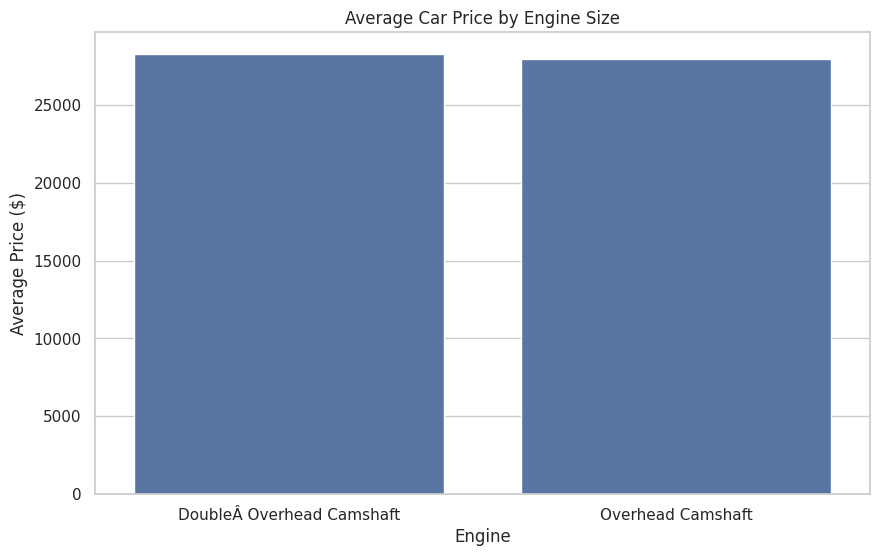

In [25]:
# Calculate the average car price for each engine size
average_price_by_engine_size = car_data.groupby('Engine')['Price ($)'].mean()

# Display the result
print("Average Car Price by Engine Size:")
print(average_price_by_engine_size)

# Visualization (optional)
plt.figure(figsize=(10, 6))
sns.barplot(x=average_price_by_engine_size.index, y=average_price_by_engine_size.values)
plt.xlabel('Engine')
plt.ylabel('Average Price ($)')
plt.title('Average Car Price by Engine Size')
plt.show()

**9. How do car prices vary based on the customer’s annual income bracket?**

Average Car Price by Annual Income Bracket:
Income Bracket
0-50k        27884.297820
50k-100k     43000.000000
100k-150k    23200.200000
150k+        28149.089557
Name: Price ($), dtype: float64


<ipython-input-26-bf70f96a70b9>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_price_by_income_bracket = car_data.groupby('Income Bracket')['Price ($)'].mean()


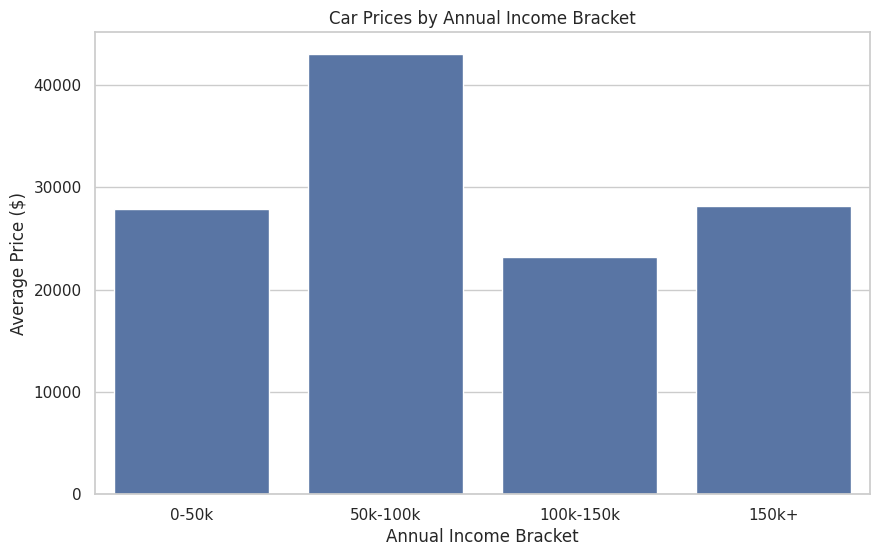

In [26]:
# Create income brackets (adjust these as needed)
income_brackets = pd.cut(car_data['Annual Income'], bins=[0, 50000, 100000, 150000, float('inf')], labels=['0-50k', '50k-100k', '100k-150k', '150k+'])
car_data['Income Bracket'] = income_brackets

# Group by income bracket and calculate average car price
average_price_by_income_bracket = car_data.groupby('Income Bracket')['Price ($)'].mean()

# Display the result
print("Average Car Price by Annual Income Bracket:")
print(average_price_by_income_bracket)

# Visualization (optional)
plt.figure(figsize=(10, 6))
sns.barplot(x=average_price_by_income_bracket.index, y=average_price_by_income_bracket.values)
plt.xlabel('Annual Income Bracket')
plt.ylabel('Average Price ($)')
plt.title('Car Prices by Annual Income Bracket')
plt.show()

**10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?**

Top 5 car models with the highest number of sales:
Model
Diamante      418
Prizm         411
Silhouette    411
Passat        391
Ram Pickup    383
Name: count, dtype: int64


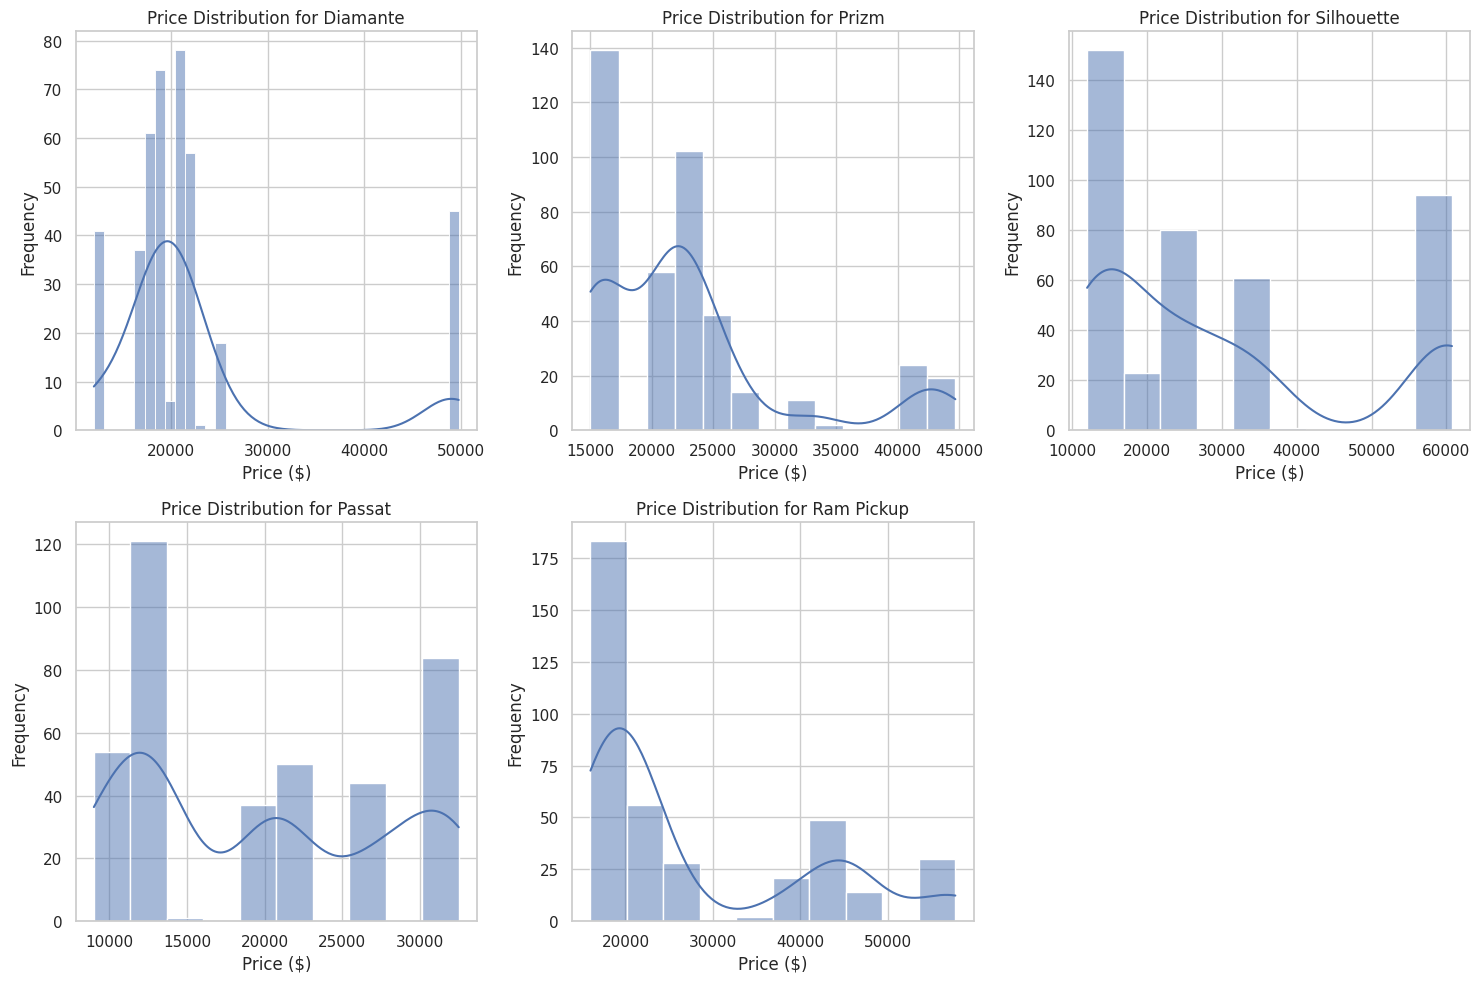

In [28]:
# Calculate the sales count for each car model
top_models = car_data['Model'].value_counts().nlargest(5)

print("Top 5 car models with the highest number of sales:")
print(top_models)

# Create subplots for price distributions of top models
plt.figure(figsize=(15, 10))

for i, model in enumerate(top_models.index):
    plt.subplot(2, 3, i + 1)
    sns.histplot(car_data[car_data['Model'] == model]['Price ($)'], kde=True)
    plt.title(f'Price Distribution for {model}')
    plt.xlabel('Price ($)')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**11. How does car price vary with engine size across different car colors, and which colors have the highest price variation?**

Colors with the highest price variation for each engine size:
Engine
DoubleÂ Overhead Camshaft    (DoubleÂ Overhead Camshaft, Pale White)
Overhead Camshaft                         (Overhead Camshaft, Black)
Name: std, dtype: object


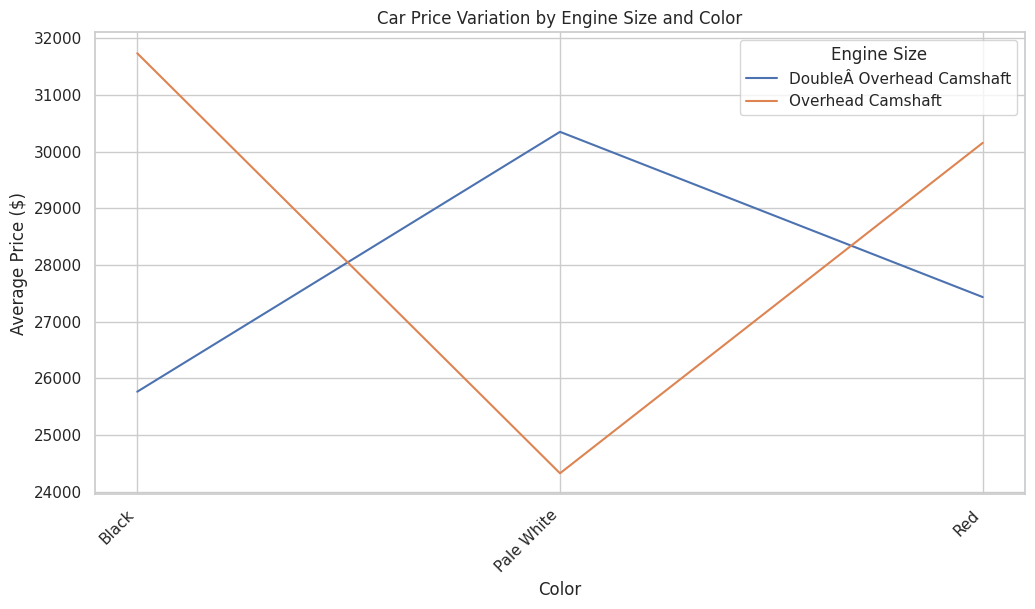

In [29]:
# Group data by engine size and color, then calculate the average price
price_variation_by_engine_color = car_data.groupby(['Engine', 'Color'])['Price ($)'].agg(['mean', 'std'])

# Find colors with the highest price variation for each engine size
max_variation_by_engine = price_variation_by_engine_color.groupby('Engine')['std'].idxmax()

print("Colors with the highest price variation for each engine size:")
print(max_variation_by_engine)

# Visualization (optional)
plt.figure(figsize=(12, 6))
for engine in price_variation_by_engine_color.index.get_level_values('Engine').unique():
    engine_data = price_variation_by_engine_color.loc[engine]
    sns.lineplot(x=engine_data.index, y=engine_data['mean'], label=engine)

plt.xlabel('Color')
plt.ylabel('Average Price ($)')
plt.title('Car Price Variation by Engine Size and Color')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Engine Size')
plt.show()

**12. Is there any seasonal trend in car sales based on the date of sale?**

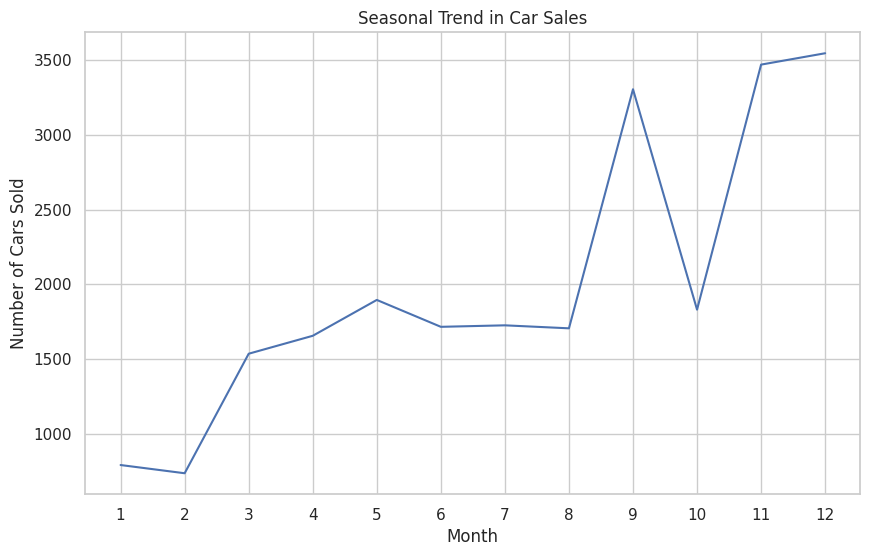

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# If not, convert it first:
car_data['Date'] = pd.to_datetime(car_data['Date'])

# Extract month from the date
car_data['Month'] = car_data['Date'].dt.month

# Group by month and count sales
monthly_sales = car_data.groupby('Month')['Price ($)'].count()

# Visualize monthly sales
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values)
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.title('Seasonal Trend in Car Sales')
plt.xticks(range(1, 13))  # Set x-axis ticks to months
plt.show()


**13. How does the car price distribution change when considering different combinations of body style and transmission type?**

Car Price Distribution by Body Style and Transmission Type:
                          count          mean           std      min      25%  \
Body Style Transmission                                                         
Hardtop    Auto          1408.0  31520.188210  13687.756740  12000.0  21001.0   
           Manual        1563.0  27016.943698  14072.501848  11000.0  17575.5   
Hatchback  Auto          3458.0  25910.544824  13144.014337   4200.0  18001.0   
           Manual        2670.0  28702.550562  16284.049616   1700.0  17000.0   
Passenger  Auto          2020.0  28915.835149  13946.481932   9000.0  19000.0   
           Manual        1925.0  28969.521039  18523.684163  10000.0  16001.0   
SUV        Auto          3086.0  27501.404407  13299.927913   1200.0  19000.0   
           Manual        3288.0  26079.019161  14621.526541   2200.0  17000.0   
Sedan      Auto          2599.0  29955.294344  14310.910860  12000.0  19000.0   
           Manual        1889.0  29664.271572  15

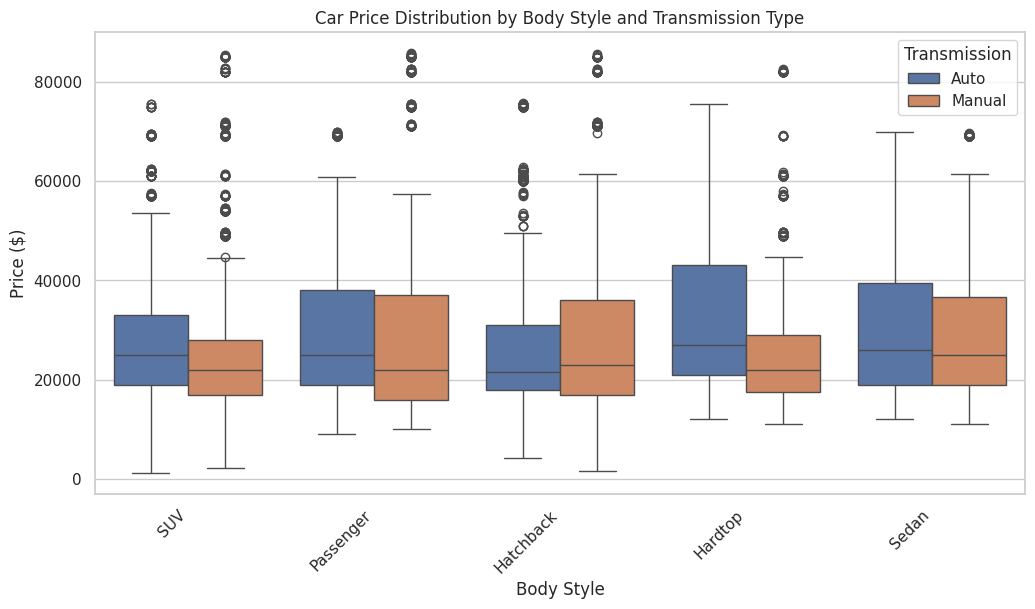

In [31]:
# Group data by body style and transmission type, then calculate price distribution statistics
price_distribution_by_body_transmission = car_data.groupby(['Body Style', 'Transmission'])['Price ($)'].describe()

# Display the results
print("Car Price Distribution by Body Style and Transmission Type:")
print(price_distribution_by_body_transmission)

# Visualization (optional)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=car_data)
plt.xlabel('Body Style')
plt.ylabel('Price ($)')
plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.xticks(rotation=45, ha='right')
plt.show()

**14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?**

Correlation Matrix:
               Price ($)  Engine_Size  Annual Income
Price ($)       1.000000    -0.011271       0.012065
Engine_Size    -0.011271     1.000000      -0.006598
Annual Income   0.012065    -0.006598       1.000000


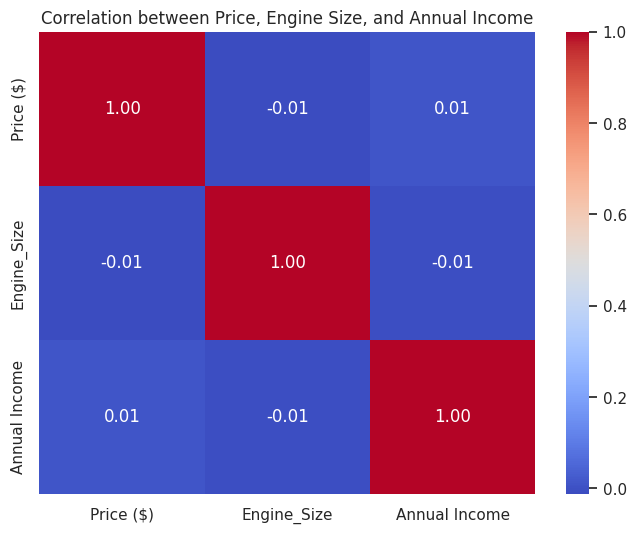

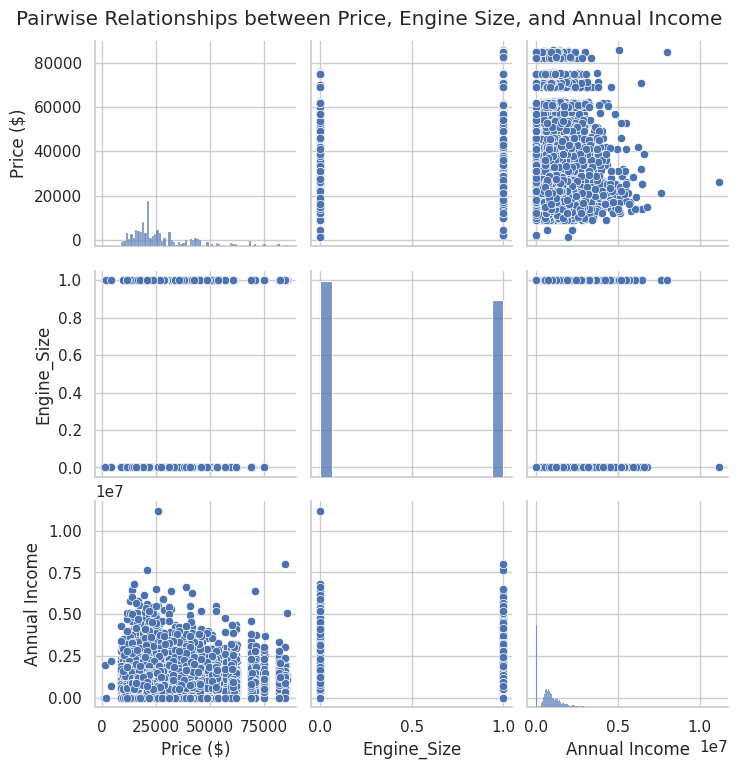

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# Convert 'Engine' to a numerical representation
car_data['Engine_Size'] = le.fit_transform(car_data['Engine'])
# Select relevant columns
relevant_data = car_data[['Price ($)','Engine_Size', 'Annual Income']]

# Calculate the correlation matrix
correlation_matrix = relevant_data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Price, Engine Size, and Annual Income')
plt.show()

# Explore interactions using scatter plots
sns.pairplot(relevant_data)
plt.suptitle('Pairwise Relationships between Price, Engine Size, and Annual Income', y=1.02)
plt.show()

**15. How does the average car price vary across different car models and engine types?**

Average Car Price by Model and Engine Type:
Engine    DoubleÂ Overhead Camshaft  Overhead Camshaft
Model                                                 
3-Sep                  37986.380117                NaN
3000GT                 22764.326923       21770.659864
300M                   21394.888889                NaN
323i                   16744.632287       21038.162162
328i                   21069.149606       38676.177215
...                             ...                ...
Viper                  32118.479167       26052.375000
Voyager                22066.026316       33995.678322
Windstar               25145.636364       17100.272727
Wrangler               21145.294737       18742.942029
Xterra                 15940.459459       31072.500000

[154 rows x 2 columns]


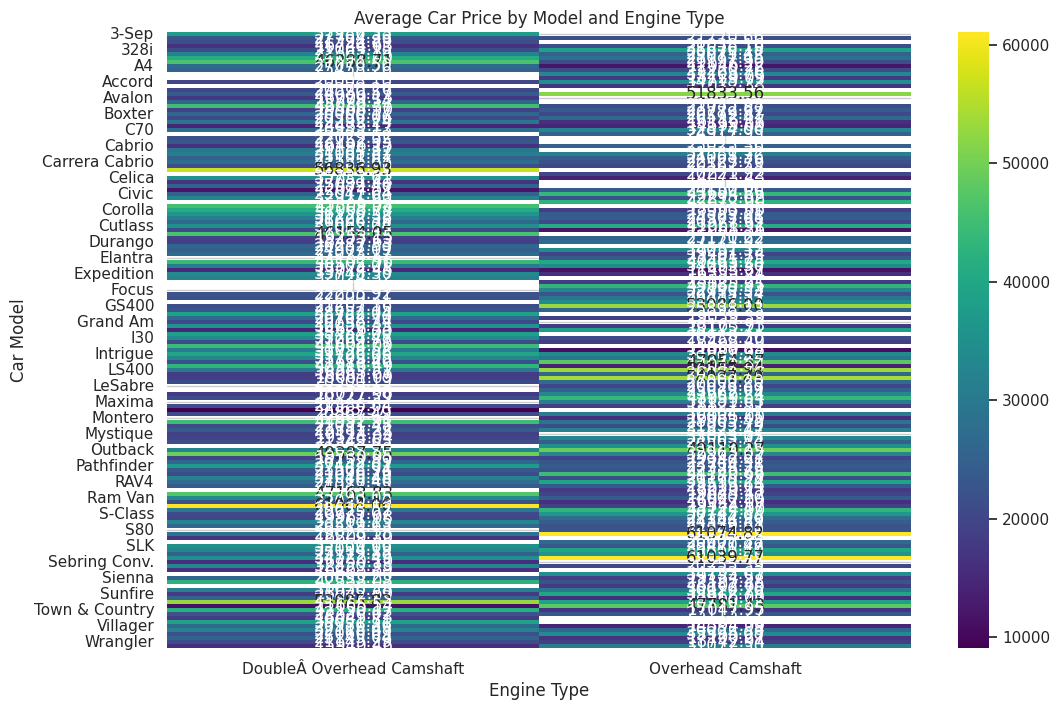

In [33]:
# Calculate the average car price for each combination of car model and engine type
average_price_by_model_engine = car_data.groupby(['Model', 'Engine'])['Price ($)'].mean().unstack()

# Display the result
print("Average Car Price by Model and Engine Type:")
print(average_price_by_model_engine)

# Visualization (optional) - Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(average_price_by_model_engine, annot=True, fmt=".2f", cmap="viridis")
plt.xlabel("Engine Type")
plt.ylabel("Car Model")
plt.title("Average Car Price by Model and Engine Type")
plt.show()

**EDA - 3 : Amazon Sales Data**

In [34]:
# Load Amazon Sales Data
amazon_data_url = "https://drive.google.com/uc?id=1yKlW0x5yyRQijmWbEg5YCsq4wqLl3_oB"
amazon_data = pd.read_csv(amazon_data_url)

# Display dataset info
amazon_data.info()
amazon_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


**1.What is the average rating for each product category?**

In [35]:
# Calculate the average rating for each product category

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# Convert 'rating' to a numerical representation
amazon_data['rating'] = le.fit_transform(amazon_data['rating'])

avg_rating_per_category = amazon_data.groupby('category')['rating'].mean()

# Display the result
print("Average Rating for Each Product Category:")
avg_rating_per_category

Average Rating for Each Product Category:


,rating
category,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,14.000000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,18.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,11.000000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,12.000000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,17.500000
...,...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens",19.500000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens",18.500000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens",20.000000


**2. What are the top rating_count products by category?**

In [36]:
# Assuming 'rating_count' is a column in your amazon_data DataFrame.
# If not, replace 'rating_count' with the actual column name.
le = LabelEncoder()
# Convert 'rating' to a numerical representation
amazon_data['rating_count'] = le.fit_transform(amazon_data['rating_count'])

top_products_by_category = amazon_data.groupby('category').apply(lambda x: x.nlargest(1, 'rating_count'))

print("Top rating_count products by category:")
print(top_products_by_category[['product_name', 'rating_count']])

Top rating_count products by category:
                                                                                              product_name  \
category                                                                                                     
Car&Motorbike|CarAccessories|InteriorAccessorie... 1157  Reffair AX30 [MAX] Portable Air Purifier for C...   
Computers&Accessories|Accessories&Peripherals|A... 695   rts [2 Pack] Mini USB C Type C Adapter Plug, T...   
Computers&Accessories|Accessories&Peripherals|A... 906   Hp Wired On Ear Headphones With Mic With 3.5 M...   
Computers&Accessories|Accessories&Peripherals|A... 772   HUMBLE Dynamic Lapel Collar Mic Voice Recordin...   
Computers&Accessories|Accessories&Peripherals|A... 844   Zebronics Zeb Wonderbar 10 USB Powered 2.0 Com...   
...                                                                                                    ...   
OfficeProducts|OfficePaperProducts|Paper|Statio... 616   Classmate Octane Neon- B

<ipython-input-36-ce9d3ad17423>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_products_by_category = amazon_data.groupby('category').apply(lambda x: x.nlargest(1, 'rating_count'))


**3. What is the distribution of discounted prices vs. actual prices?**

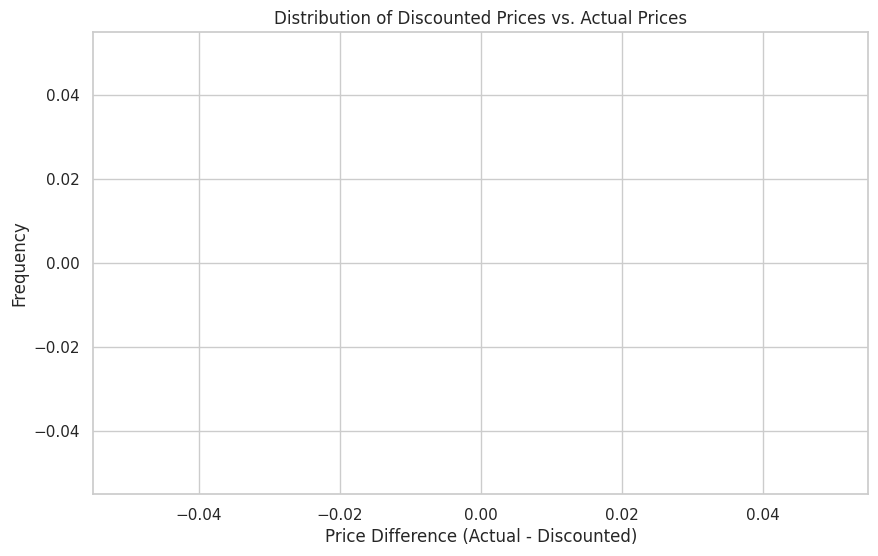

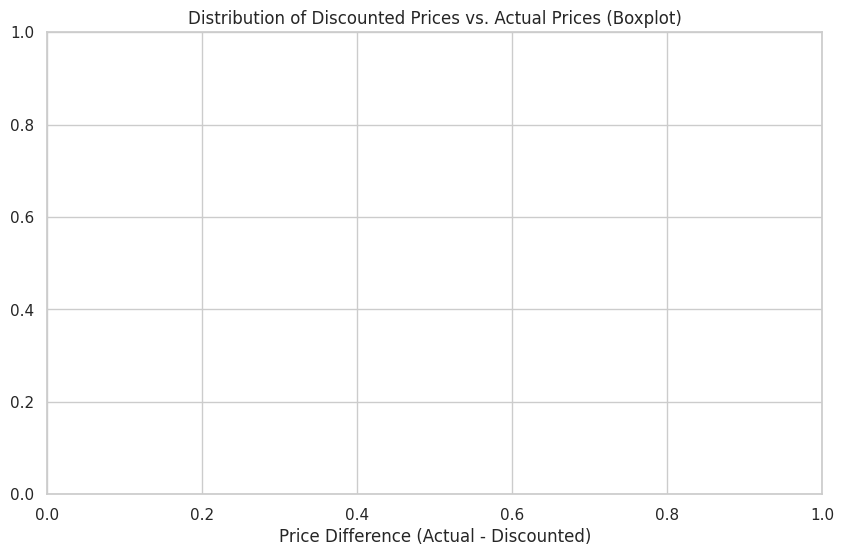

Descriptive statistics of price differences:


,price_difference
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [37]:
# Assuming 'actual_price' and 'discounted_price' are columns in your amazon_data DataFrame.
# If not, replace with the actual column names.

# Convert price columns to numeric, handling potential errors
amazon_data['actual_price'] = pd.to_numeric(amazon_data['actual_price'], errors='coerce')
amazon_data['discounted_price'] = pd.to_numeric(amazon_data['discounted_price'], errors='coerce')

# Drop rows with invalid price values
amazon_data.dropna(subset=['actual_price', 'discounted_price'], inplace=True)

# Calculate the difference between actual and discounted prices
amazon_data['price_difference'] = amazon_data['actual_price'] - amazon_data['discounted_price']


# Visualize the distribution using a histogram or a boxplot
plt.figure(figsize=(10, 6))
sns.histplot(amazon_data['price_difference'], kde=True)
plt.xlabel('Price Difference (Actual - Discounted)')
plt.ylabel('Frequency')
plt.title('Distribution of Discounted Prices vs. Actual Prices')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=amazon_data['price_difference'])
plt.xlabel('Price Difference (Actual - Discounted)')
plt.title('Distribution of Discounted Prices vs. Actual Prices (Boxplot)')
plt.show()

# Calculate descriptive statistics
price_difference_stats = amazon_data['price_difference'].describe()
print("Descriptive statistics of price differences:")
price_difference_stats

**4. How does the average discount percentage vary across categories?**

Average Discount Percentage by Category:
Series([], Name: discount_percentage, dtype: float64)


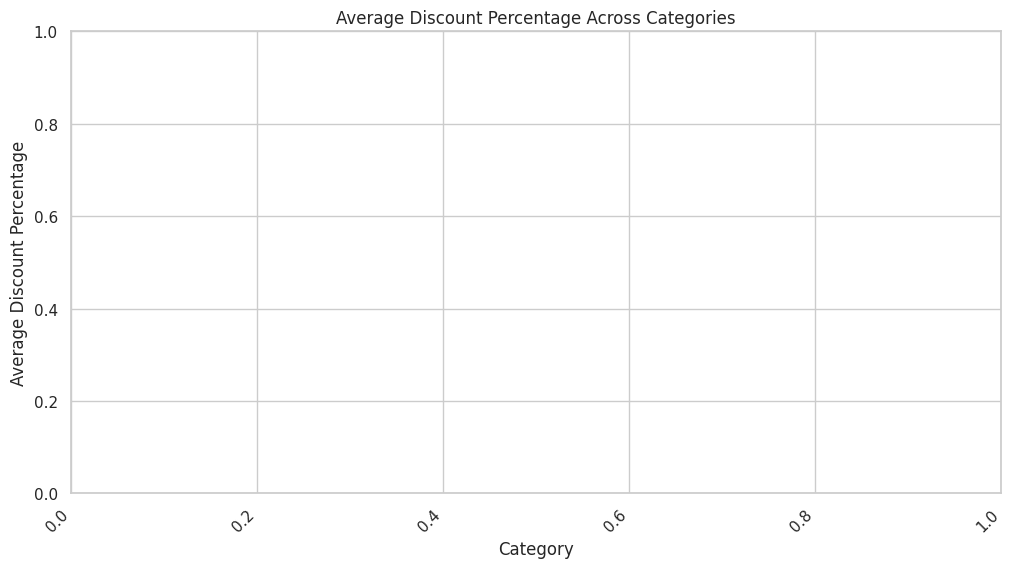

In [38]:
# Calculate the discount percentage
amazon_data['discount_percentage'] = ((amazon_data['actual_price'] - amazon_data['discounted_price']) / amazon_data['actual_price']) * 100

# Group by category and calculate the average discount percentage
average_discount_by_category = amazon_data.groupby('category')['discount_percentage'].mean()

# Display the result
print("Average Discount Percentage by Category:")
print(average_discount_by_category)

# Visualization (optional)
plt.figure(figsize=(12, 6))
sns.barplot(x=average_discount_by_category.index, y=average_discount_by_category.values)
plt.xlabel('Category')
plt.ylabel('Average Discount Percentage')
plt.title('Average Discount Percentage Across Categories')
plt.xticks(rotation=45, ha='right')
plt.show()

**5. What are the most popular product names?**

Most Popular Product Names:
Series([], Name: count, dtype: int64)


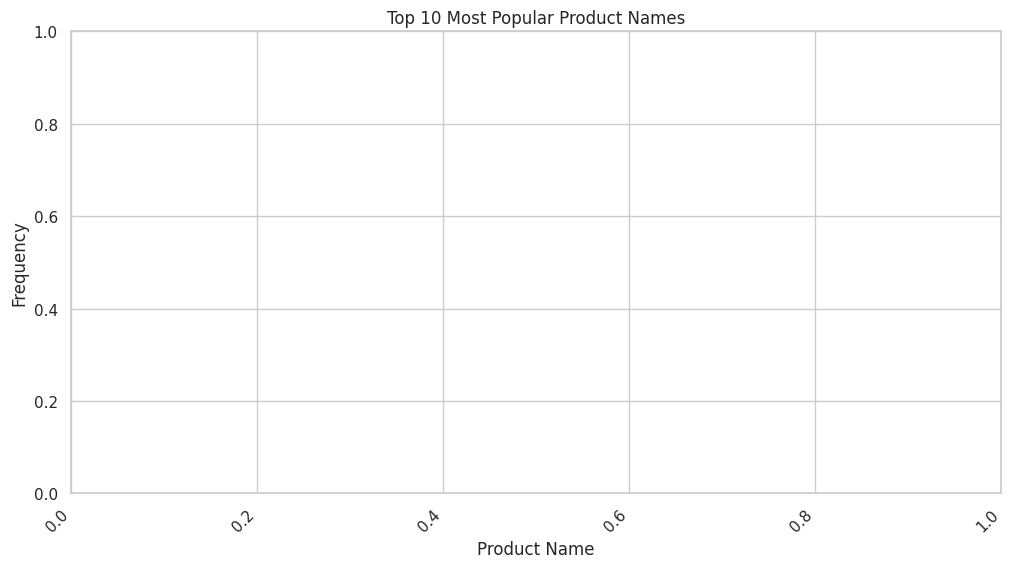

In [39]:
# Calculate the frequency of each product name
product_name_counts = amazon_data['product_name'].value_counts()

# Display the most popular product names (e.g., top 10)
print("Most Popular Product Names:")
print(product_name_counts.head(10))

# Visualization (optional) - Bar plot of top 10 product names
plt.figure(figsize=(12, 6))
sns.barplot(x=product_name_counts.head(10).index, y=product_name_counts.head(10).values)
plt.xlabel('Product Name')
plt.ylabel('Frequency')
plt.title('Top 10 Most Popular Product Names')
plt.xticks(rotation=45, ha='right')
plt.show()


**6. What are the most popular product keywords?**

In [40]:
# Assuming 'product_name' contains keywords, you can extract them and count their frequency.
from collections import Counter

def extract_keywords(product_name):
    # Basic keyword extraction (you can refine this based on your needs)
    keywords = product_name.lower().split()  # Split the name into words
    return keywords

# Create a list to hold all keywords
all_keywords = []

for product_name in amazon_data['product_name']:
    keywords = extract_keywords(product_name)
    all_keywords.extend(keywords)

# Count the frequency of each keyword
keyword_counts = Counter(all_keywords)

# Get the most common keywords (e.g., top 10)
most_common_keywords = keyword_counts.most_common(10)

# Check if most_common_keywords is empty before unpacking
if most_common_keywords:
    print("Most Popular Product Keywords:")
    for keyword, count in most_common_keywords:
        print(f"{keyword}: {count}")

    # Visualization (optional) - Bar plot of top 10 keywords
    plt.figure(figsize=(12, 6))
    keywords, counts = zip(*most_common_keywords)  # Separate keywords and counts for plotting
    sns.barplot(x=list(keywords), y=list(counts))
    plt.xlabel('Keywords')
    plt.ylabel('Frequency')
    plt.title('Top 10 Most Popular Product Keywords')
    plt.xticks(rotation=45, ha='right')
    plt.show()
else:
    print("No common keywords found in product names.")

No common keywords found in product names.


**7. What are the most popular product reviews?**

Most Popular Product Review Titles:
Series([], Name: count, dtype: int64)


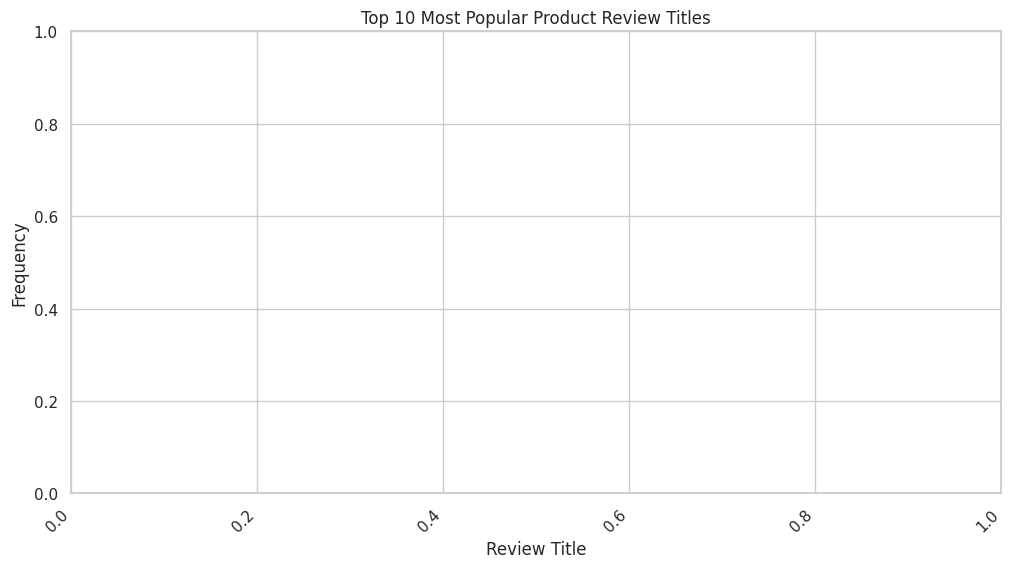

In [41]:
# Assuming 'review_title' is a column in your amazon_data DataFrame.
# If not, replace 'review_title' with the actual column name.

popular_reviews = amazon_data['review_title'].value_counts()

print("Most Popular Product Review Titles:")
print(popular_reviews.head(10))  # Display the top 10 most popular review titles

# Visualization (optional) - Bar plot of top 10 review titles
plt.figure(figsize=(12, 6))
sns.barplot(x=popular_reviews.head(10).index, y=popular_reviews.head(10).values)
plt.xlabel('Review Title')
plt.ylabel('Frequency')
plt.title('Top 10 Most Popular Product Review Titles')
plt.xticks(rotation=45, ha='right')
plt.show()

**8. What is the correlation between discounted_price and rating?**

In [42]:
# Calculate the correlation between 'discounted_price' and 'rating'
correlation = amazon_data['discounted_price'].corr(amazon_data['rating'])

print(f"The correlation between discounted_price and rating is: {correlation}")

The correlation between discounted_price and rating is: nan


**9. What are the Top 5 categories based on the highest ratings?**

In [43]:
# Sort categories by average rating in descending order and get the top 5
top_5_categories = avg_rating_per_category.sort_values(ascending=False).head(5)

print("Top 5 categories based on the highest ratings:")
top_5_categories

Top 5 categories based on the highest ratings:


,rating
category,
Computers&Accessories|Tablets,23.0
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters,22.0
Electronics|Cameras&Photography|Accessories|Film,22.0
Computers&Accessories|Components|Memory,22.0
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients,22.0


**10. Identify any potential areas for improvement or optimization based on the data analysis.**

Ans:- Potential areas for improvement and optimization:

Data Cleaning and Preprocessing:

Handle missing values more effectively. Instead of dropping rows with missing prices, consider imputation techniques (e.g., mean, median, or more sophisticated methods) to retain more data.

Investigate the meaning of '0' values in numerical columns (e.g. 'Annual Income', 'Price', 'Engine Size') and decide on the best way to handle them.
Inconsistent data formats may exist in some fields, such as dates or prices. Ensure consistency with type conversion and formatting.

Feature Engineering:

Create new features that capture important information not explicitly represented in the data. For example, derived features such as "Price per Horsepower," "Discount Percentage," or "Age of the Car" can improve analysis.

Explore creating interaction terms in the correlation analysis (e.g., 'Engine_Size' * 'Annual Income').

Binning numerical data ('Annual Income') to create meaningful categories may reveal additional insights.

Visualization Enhancements:

Use more informative plot types when appropriate. For example, consider using scatter plots to examine the relationship between continuous variables instead of just heatmaps.

Improve the readability of visualizations by using clear labels, titles, and legends.

Explore more advanced visualizations like interactive plots for better exploration and communication of findings.

Statistical Analysis:

Perform more detailed statistical tests beyond correlation analysis, such as t-tests or ANOVA, to validate hypotheses about relationships between variables.

Conduct hypothesis testing to test assumptions before drawing conclusions.

Model Building (If applicable):

If you plan to build predictive models, carefully select appropriate models and features, and evaluate their performance rigorously.

Consider feature scaling and encoding when applying machine learning algorithms.

Optimize model hyperparameters for better accuracy and generalization.

Keyword Extraction Refinement:

Use more robust keyword extraction techniques beyond simple splitting. Natural language processing (NLP) techniques can lead to better keyword identification.

Robustness of encoding:

LabelEncoder's application should be handled cautiously. Explore OneHotEncoding or other encoding methods, especially when dealing with features that do not necessarily represent any ordinal relationship.

Data Exploration Depth:

Dive deeper into the unique values of categorical columns and their distribution in relation to the target variable (e.g., 'Price').
Segment the data into relevant groups (e.g., by 'Region', 'Model') for more detailed analyses.

Documentation:

Include detailed explanations of the steps and rationale behind the data cleaning, feature engineering, and analysis. This improves code clarity and facilitates collaboration.

Code Structure:

Modularize the code into reusable functions for improved readability and maintainability.

By addressing these potential areas for improvement, you can gain a deeper understanding of the data, improve model accuracy (if applicable), and enhance the insights derived from the analysis.

**EDA-04 Spotify Data**

In [44]:
# Load Spotify Data
spotify_data_url = "https://drive.google.com/uc?id=1JVgy2yXUOREkzRdCeWjep626uvvF94pP"
spotify_data = pd.read_csv(spotify_data_url)

# Display dataset info
spotify_data.info()
spotify_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


**1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful?**

In [45]:
# Check for null values
print(spotify_data.isnull().sum())

# Handle null values (example: fill with 0)
spotify_data.fillna(0, inplace=True)

# Check for duplicate rows
duplicate_rows = spotify_data[spotify_data.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows)}")

# Handle duplicate rows (example: remove duplicates)
spotify_data.drop_duplicates(inplace=True)


Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
Number of duplicate rows: 27


**2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram?**

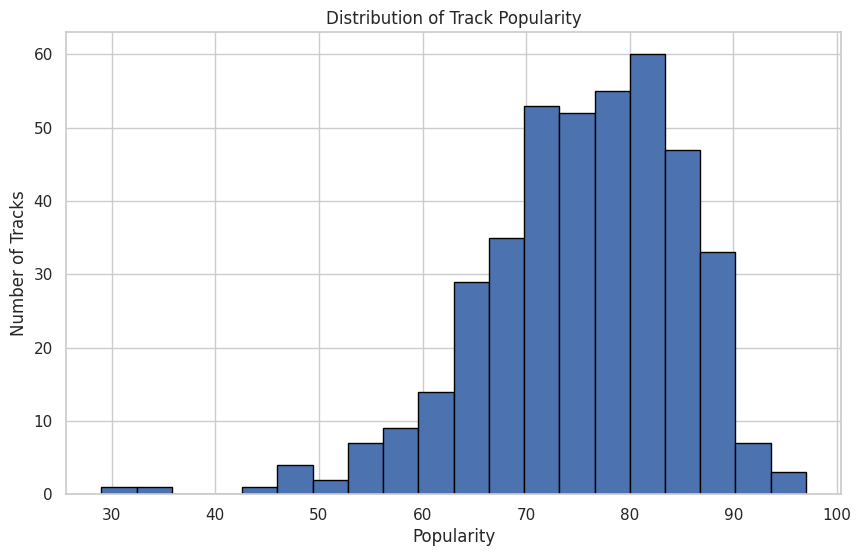

In [46]:
# Calculate the frequency of each popularity value
popularity_counts = spotify_data['Popularity'].value_counts()

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(spotify_data['Popularity'], bins=20, edgecolor='black')  # Changed 'popularity' to 'Popularity'
plt.xlabel('Popularity')
plt.ylabel('Number of Tracks')
plt.title('Distribution of Track Popularity')
plt.show()

**3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot?**

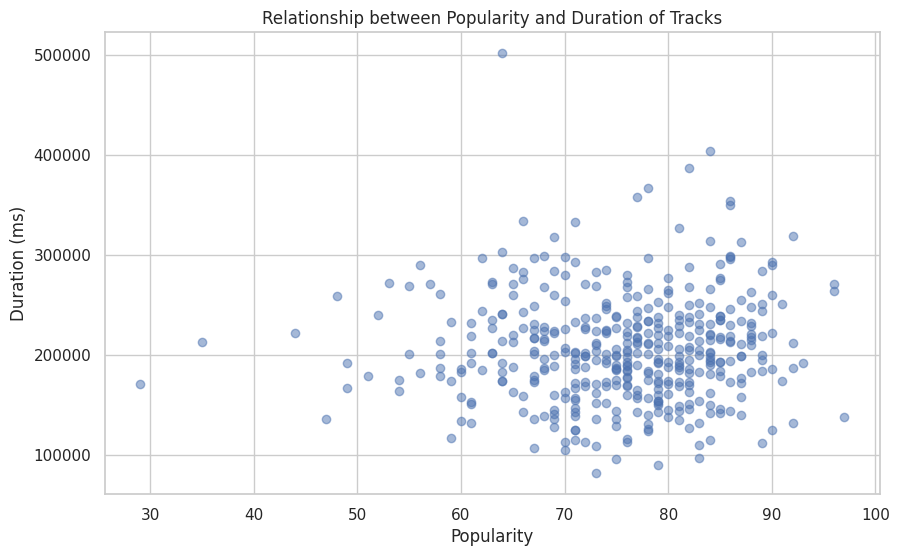

In [47]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(spotify_data['Popularity'], spotify_data['Duration (ms)'], alpha=0.5)
plt.xlabel('Popularity')
plt.ylabel('Duration (ms)')
plt.title('Relationship between Popularity and Duration of Tracks')
plt.show()

**4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.**

The artist with the highest number of tracks is Drake with 17 tracks.


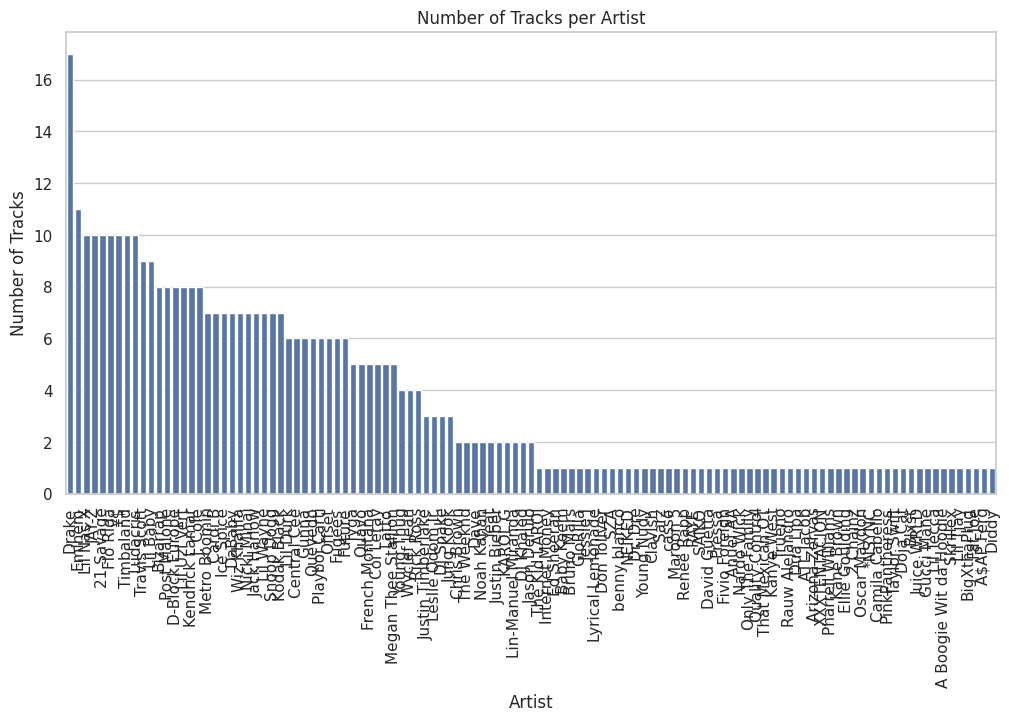

In [48]:
# Calculate the number of tracks for each artist
artist_track_counts = spotify_data['Artist'].value_counts()

# Find the artist with the highest number of tracks
artist_with_highest_tracks = artist_track_counts.index[0]
highest_track_count = artist_track_counts.iloc[0]

print(f"The artist with the highest number of tracks is {artist_with_highest_tracks} with {highest_track_count} tracks.")

# Create the countplot
plt.figure(figsize=(12, 6))
sns.countplot(x='Artist', data=spotify_data, order=artist_track_counts.index)
plt.xlabel('Artist')
plt.ylabel('Number of Tracks')
plt.title('Number of Tracks per Artist')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

**5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.**

In [49]:

# Sort the DataFrame by popularity in ascending order and get the top 5
least_popular_tracks = spotify_data.sort_values(by='Popularity').head(5)

# Display the artist name and track name for the least popular tracks
print("Top 5 Least Popular Tracks:")
print(least_popular_tracks[['Artist', 'Track Name']])

Top 5 Least Popular Tracks:
             Artist                     Track Name
207          Pressa  Attachments (feat. Coi Leray)
231   Justin Bieber                     Intentions
413  French Montana                Splash Brothers
225        Lil Baby                  On Me - Remix
407     Wyclef Jean      911 (feat. Mary J. Blige)


**6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.**

In [50]:
# Find the top 5 most popular artists
top_5_artists = spotify_data['Artist'].value_counts().head(5).index

# Calculate the average popularity for each of the top 5 artists
average_popularity_by_artist = {}
for artist in top_5_artists:
    artist_data = spotify_data[spotify_data['Artist'] == artist]
    average_popularity = artist_data['Popularity'].mean()
    average_popularity_by_artist[artist] = average_popularity

# Find the artist with the highest average popularity among the top 5
artist_with_highest_avg_popularity = max(average_popularity_by_artist, key=average_popularity_by_artist.get)
highest_average_popularity = average_popularity_by_artist[artist_with_highest_avg_popularity]

# Display the results
print("Average Popularity for Top 5 Artists:")
for artist, avg_popularity in average_popularity_by_artist.items():
    print(f"{artist}: {avg_popularity}")

print(f"\nThe artist with the highest average popularity among the top 5 is {artist_with_highest_avg_popularity} with an average popularity of {highest_average_popularity}")


Average Popularity for Top 5 Artists:
Drake: 82.88235294117646
Eminem: 83.63636363636364
Lil Nas X: 75.9
JAY-Z: 77.9
21 Savage: 83.8

The artist with the highest average popularity among the top 5 is 21 Savage with an average popularity of 83.8


**7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.**

In [51]:
# Find the top 5 most popular artists
top_5_artists = spotify_data['Artist'].value_counts().head(5).index

# Iterate through the top 5 artists and find their most popular track
for artist in top_5_artists:
    artist_data = spotify_data[spotify_data['Artist'] == artist]
    most_popular_track = artist_data.loc[artist_data['Popularity'].idxmax()]
    print(f"Artist: {artist}, Most Popular Track: {most_popular_track['Track Name']}")

Artist: Drake, Most Popular Track: Rich Baby Daddy (feat. Sexyy Red & SZA)
Artist: Eminem, Most Popular Track: Without Me
Artist: Lil Nas X, Most Popular Track: THATS WHAT I WANT
Artist: JAY-Z, Most Popular Track: Ni**as In Paris
Artist: 21 Savage, Most Popular Track: redrum


**8. Visualize relationships between multiple numerical variables simultaneously using a pair plot.**

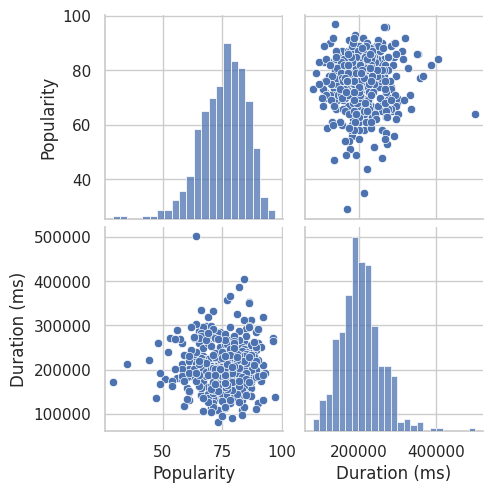

In [52]:
# Create a pair plot for numerical variables in the spotify_data DataFrame.
numerical_cols = spotify_data.select_dtypes(include=np.number).columns
sns.pairplot(spotify_data[numerical_cols])
plt.show()


**9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.**

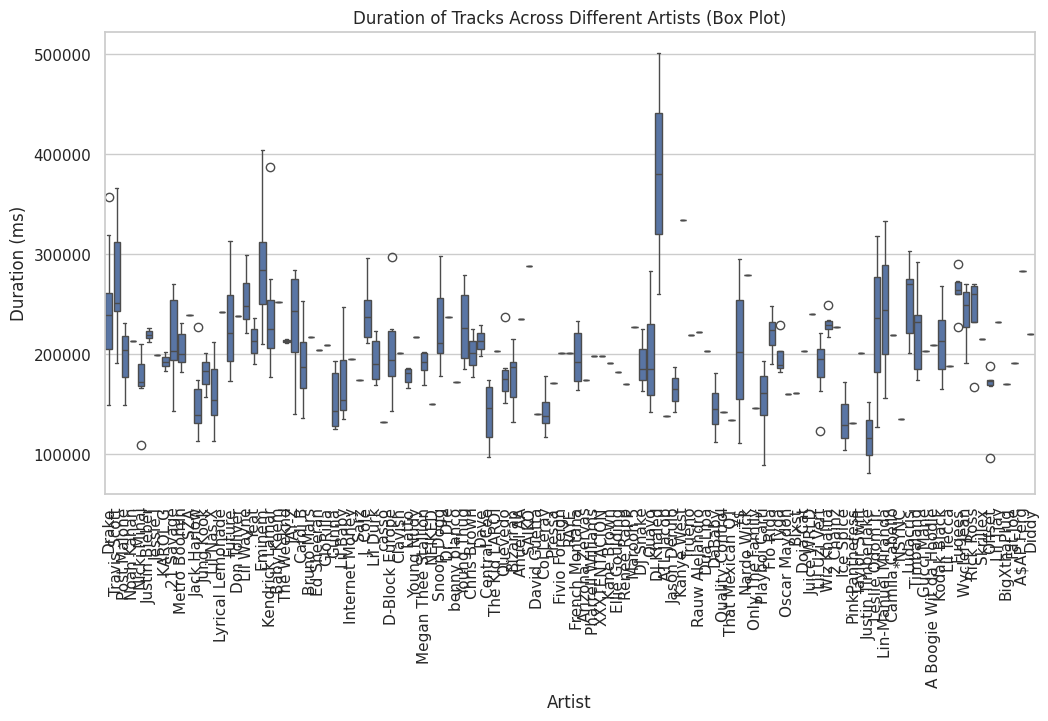

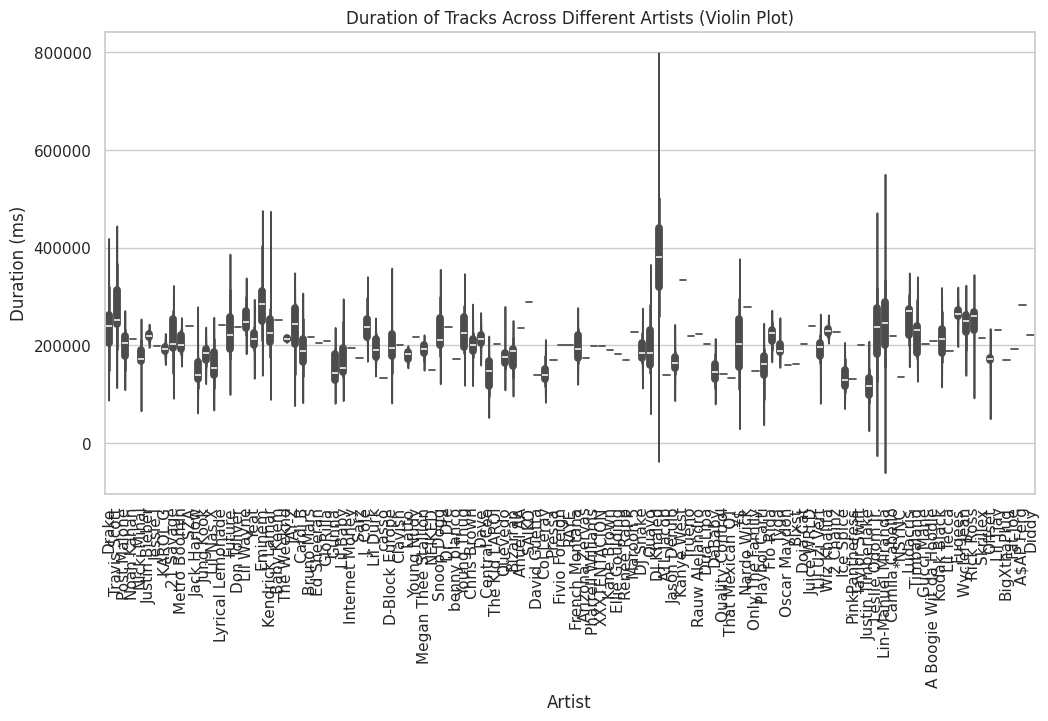

In [54]:
# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Artist', y='Duration (ms)', data=spotify_data)
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.title('Duration of Tracks Across Different Artists (Box Plot)')
plt.xticks(rotation=90)
plt.show()

# Create the violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Artist', y='Duration (ms)', data=spotify_data)
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.title('Duration of Tracks Across Different Artists (Violin Plot)')
plt.xticks(rotation=90)
plt.show()

**10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.**

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 52.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 44.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 62.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 28.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 30.0% of the points cannot be plac

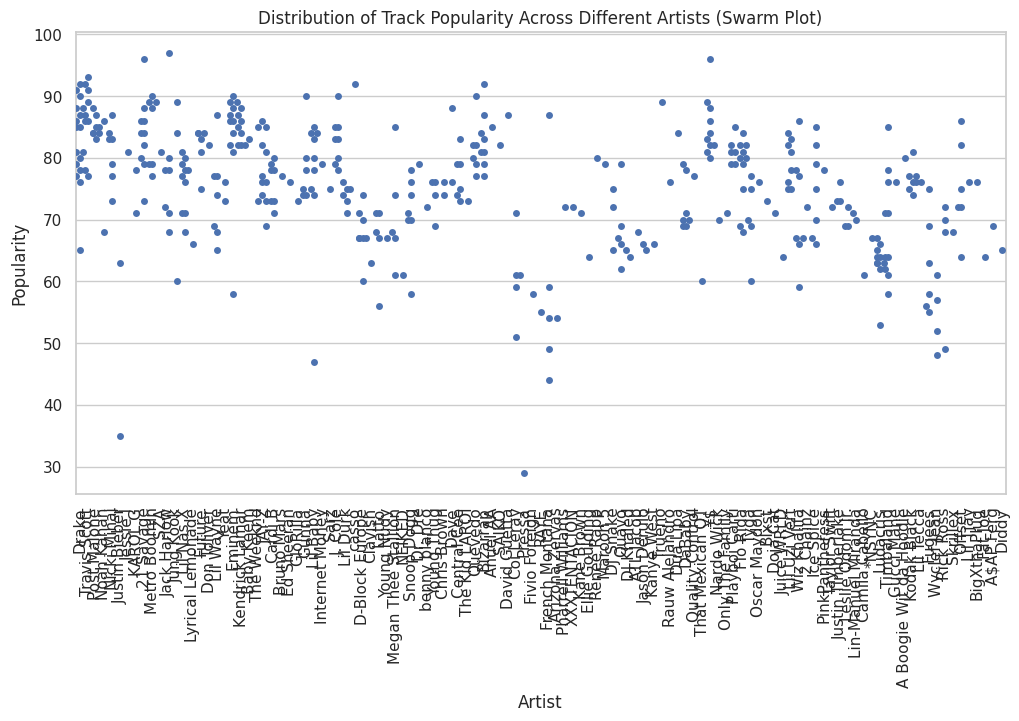

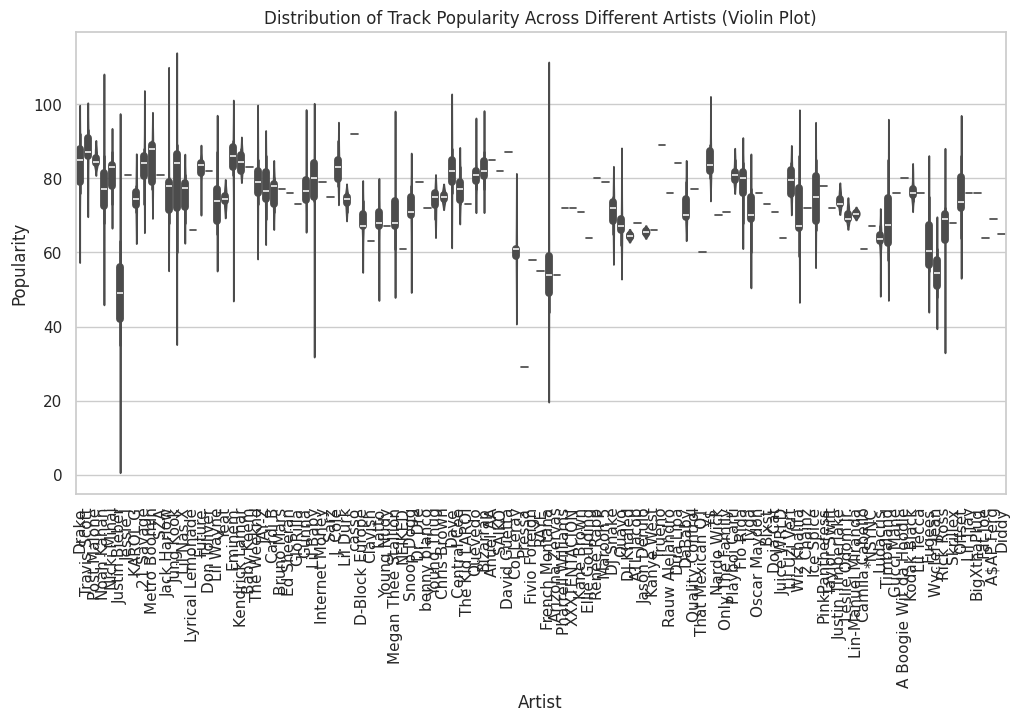

In [55]:
# Create the swarm plot
plt.figure(figsize=(12, 6))
sns.swarmplot(x='Artist', y='Popularity', data=spotify_data)
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.title('Distribution of Track Popularity Across Different Artists (Swarm Plot)')
plt.xticks(rotation=90)
plt.show()

# Create the violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Artist', y='Popularity', data=spotify_data)
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.title('Distribution of Track Popularity Across Different Artists (Violin Plot)')
plt.xticks(rotation=90)
plt.show()